In [89]:
### Xue Wang, 29/98/2020, EnergyHackDay2020, Brugg

In [87]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Load file

* Load smart meter file 

In [42]:
df=pd.read_excel("Lastgang Elektroverbruche 160101-170511.xlsx")
df.head(6)

,Datum Zeit,Messung Gebäude 2ewz [kWh]
0,2016-01-01 00:15:00,2.85
1,2016-01-01 00:30:00,2.85
2,2016-01-01 00:45:00,3.00
3,2016-01-01 01:00:00,2.94
4,2016-01-01 01:15:00,2.79
5,2016-01-01 01:30:00,2.79


*  Create zurich public days from internet

In [43]:
df10=pd.read_csv("zurich_holiday.csv")
df10.head()

,No.,zurich_public_holiday
0,1,1/1/2016
1,2,3/25/2016
2,3,5/6/2016
3,4,5/16/2016
4,5,8/1/2016


In [44]:
df10['zurich_public_holiday']=pd.to_datetime(df10.zurich_public_holiday)
df11=df10[['zurich_public_holiday']]
df11.columns=['date']
df11['date1']=df11['date'].dt.date
df11

,date,date1
0,2016-01-01,2016-01-01
1,2016-03-25,2016-03-25
2,2016-05-06,2016-05-06
3,2016-05-16,2016-05-16
4,2016-08-01,2016-08-01
5,2016-12-26,2016-12-26
6,2017-01-02,2017-01-02
7,2017-04-01,2017-04-01
8,2017-04-17,2017-04-17
9,2017-05-25,2017-05-25


### Data wrangling

* Add weekday, date and day_type information to dataset

In [45]:
df.columns=['Time','Power']

In [46]:
df['date']=df['Time'].dt.date

In [47]:
df['day_name'] = df['Time'].dt.day_name()

In [48]:
df['dayofweek'] = df['Time'].dt.dayofweek

In [49]:
df['monthofyear'] = df['Time'].dt.month

In [50]:
df['dayofyear'] = df['Time'].dt.dayofyear

In [51]:
df['hour'] = df['Time'].dt.hour

In [52]:
df['year'] = df['Time'].dt.year

In [53]:
df['holiday']=''

In [54]:
for d in df11.date1:
    df.loc[df['date']==d,'holiday']='Yes'

In [55]:
df['day_type']=''

In [56]:
df.loc[df['day_name']=='Saturday','day_type']='no_working_day'

In [57]:
df.loc[df['day_name']=='Sunday','day_type']='no_working_day'

In [58]:
df.loc[df['holiday']=='Yes','day_type']='no_working_day'

In [59]:
df.loc[df['day_type']=='','day_type']='working_day'

In [60]:
df

,Time,Power,date,day_name,dayofweek,monthofyear,dayofyear,hour,year,holiday,day_type
0,2016-01-01 00:15:00,2.85,2016-01-01,Friday,4,1,1,0,2016,Yes,no_working_day
1,2016-01-01 00:30:00,2.85,2016-01-01,Friday,4,1,1,0,2016,Yes,no_working_day
2,2016-01-01 00:45:00,3.00,2016-01-01,Friday,4,1,1,0,2016,Yes,no_working_day
3,2016-01-01 01:00:00,2.94,2016-01-01,Friday,4,1,1,1,2016,Yes,no_working_day
4,2016-01-01 01:15:00,2.79,2016-01-01,Friday,4,1,1,1,2016,Yes,no_working_day
...,...,...,...,...,...,...,...,...,...,...,...
47576,2017-05-10 23:00:00,3.60,2017-05-10,Wednesday,2,5,130,23,2017,,working_day
47577,2017-05-10 23:15:00,3.51,2017-05-10,Wednesday,2,5,130,23,2017,,working_day
47578,2017-05-10 23:30:00,3.60,2017-05-10,Wednesday,2,5,130,23,2017,,working_day
47579,2017-05-10 23:45:00,3.51,2017-05-10,Wednesday,2,5,130,23,2017,,working_day


In [22]:
df.set_index('Time', inplace=True)

### Data Exploratory

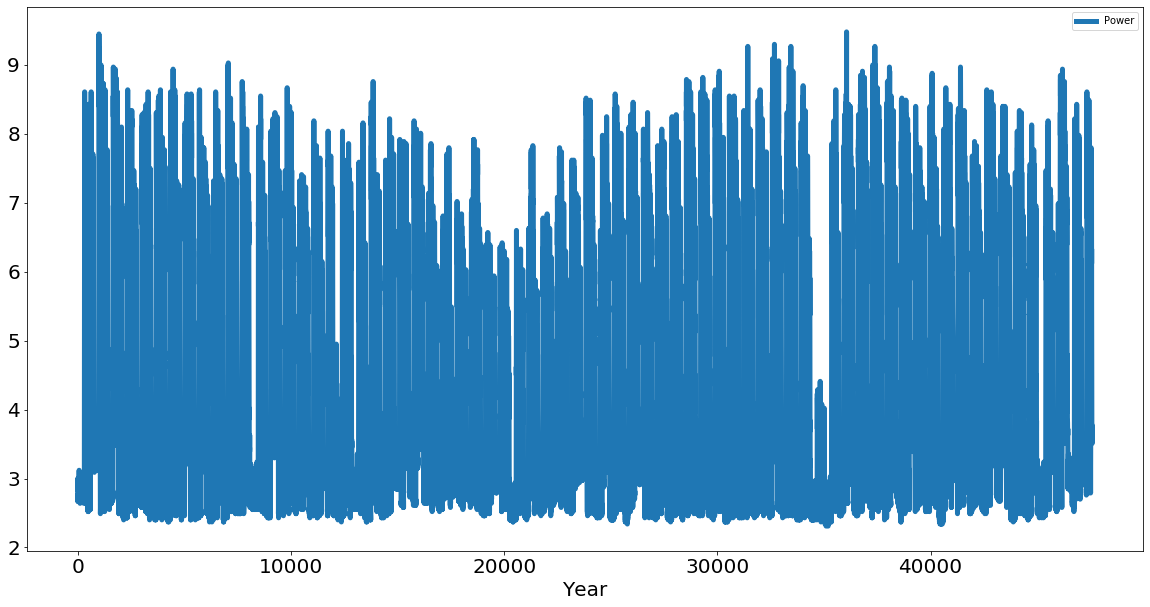

In [61]:
df[['Power']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

* Around 2017 January, the power is relatively, but it could be because the data doesn't include whole circle for Christmas period

#### Explore data according as working day and no working day

In [24]:
df1=df[df['day_type']=='working_day']

In [25]:
df2=df[df['day_type']=='no_working_day']

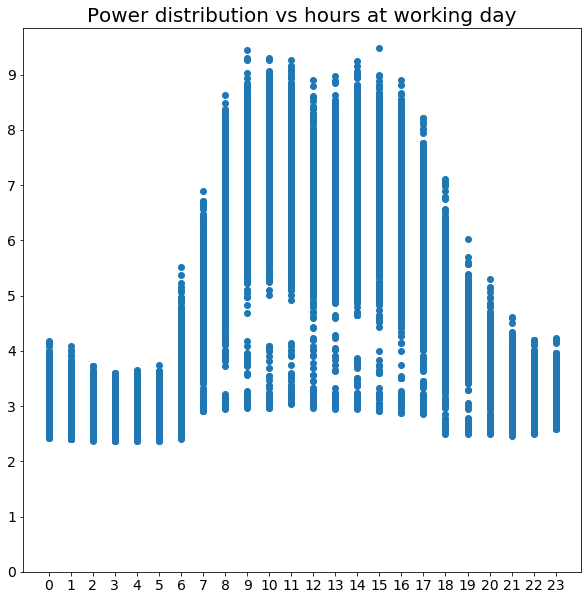

In [68]:
x=df1['hour']
y=df1['Power']
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.title('Power distribution vs hours at working day', fontsize=20)
plt.xticks(np.arange(0, 24, 1),fontsize=14)
plt.yticks(np.arange(0, 10, 1),fontsize=14)
plt.show();

* Around 10 to 12 and around 14, the power either greater than 5, or lower than 4, could be coffe and lunch time

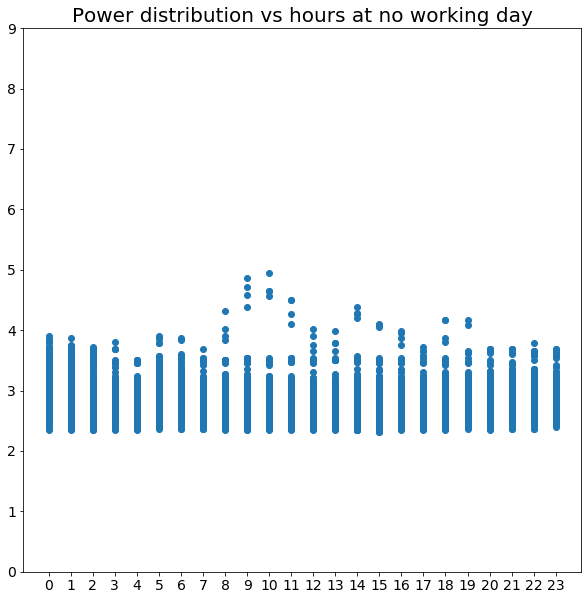

In [77]:
x=df2['hour']
y=df2['Power']
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.title('Power distribution vs hours at no working day', fontsize=20)
plt.xticks(np.arange(0, 24, 1),fontsize=14)
plt.yticks(np.arange(0, 10, 1),fontsize=14)
plt.show()

* There are some peak points between 8 to 12, might be people working at that time in the office or other working related.

In [28]:
import seaborn as sb

Text(0.5, 1.0, 'hour vs. Power at working day')

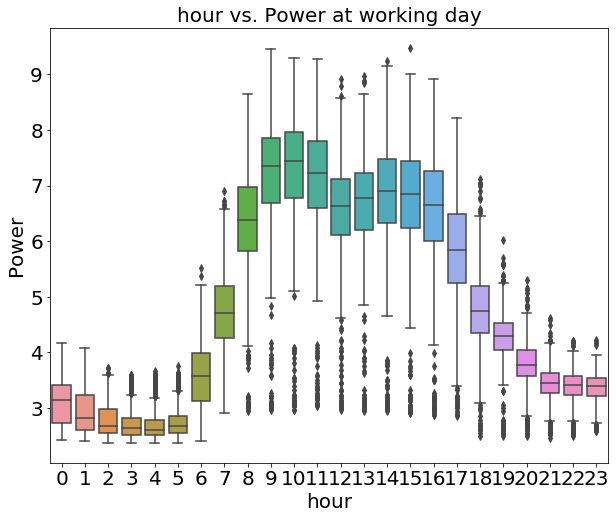

In [29]:
plt.figure(figsize = [15, 5]) 
b=sb.boxplot(data = df1, x = 'hour', y = 'Power')
plt.gcf().set_size_inches(10, 8)
plt.xlabel('hour')
b.set_xlabel("hour",fontsize=20)
b.set_ylabel("power",fontsize=20)
b.tick_params(labelsize=20)
plt.ylabel('Power')
b.axes.set_title("hour vs. Power at working day",fontsize=20)

Text(0.5, 1.0, 'hour vs. Power at no working day')

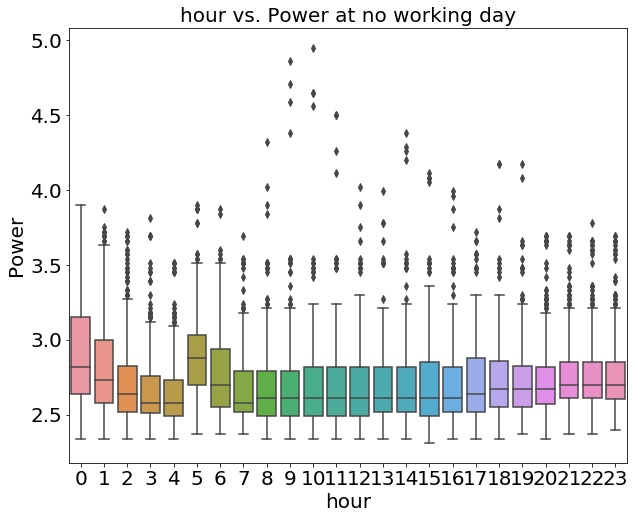

In [31]:
plt.figure(figsize = [15, 5]) 
b=sb.boxplot(data = df2, x = 'hour', y = 'Power')
plt.gcf().set_size_inches(10, 8)
plt.xlabel('hour')
b.set_xlabel("hour",fontsize=20)
b.set_ylabel("power",fontsize=20)
b.tick_params(labelsize=20)
plt.ylabel('Power')
b.axes.set_title("hour vs. Power at no working day",fontsize=20)


#### Some outliers display

* Working day at 13hr, and power less than 4

In [30]:
df12=df1[(df1.hour==13) & (df1.Power<4)]
df12

,Power,date,day_name,dayofweek,monthofyear,dayofyear,hour,year,holiday,day_type
Time,,,,,,,,,,
2016-03-28 13:00:00,3.03,2016-03-28,Monday,0,3,88,13,2016,,working_day
2016-03-28 13:15:00,3.06,2016-03-28,Monday,0,3,88,13,2016,,working_day
2016-03-28 13:30:00,3.24,2016-03-28,Monday,0,3,88,13,2016,,working_day
2016-03-28 13:45:00,3.18,2016-03-28,Monday,0,3,88,13,2016,,working_day
2016-05-05 13:00:00,3.00,2016-05-05,Thursday,3,5,126,13,2016,,working_day
2016-05-05 13:15:00,2.94,2016-05-05,Thursday,3,5,126,13,2016,,working_day
2016-05-05 13:30:00,3.03,2016-05-05,Thursday,3,5,126,13,2016,,working_day
2016-05-05 13:45:00,2.97,2016-05-05,Thursday,3,5,126,13,2016,,working_day
2016-12-27 13:45:00,3.84,2016-12-27,Tuesday,1,12,362,13,2016,,working_day


In [86]:
df12.date.unique()

array([datetime.date(2016, 3, 28), datetime.date(2016, 5, 5),
       datetime.date(2016, 12, 27), datetime.date(2016, 12, 28),
       datetime.date(2016, 12, 29), datetime.date(2016, 12, 30),
       datetime.date(2017, 4, 14), datetime.date(2017, 5, 1)],
      dtype=object)

* no working day, power greater than 4

In [81]:
df21=df2[(df2.hour<=9) & (df2.hour<=11) & (df2.Power>4)]
df21

,Power,date,day_name,dayofweek,monthofyear,dayofyear,hour,year,holiday,day_type
Time,,,,,,,,,,
2016-05-06 08:30:00,4.02,2016-05-06,Friday,4,5,127,8,2016,Yes,no_working_day
2016-05-06 08:45:00,4.32,2016-05-06,Friday,4,5,127,8,2016,Yes,no_working_day
2016-05-06 09:00:00,4.59,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:15:00,4.38,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:30:00,4.71,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:45:00,4.86,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day


In [83]:
df21=df2[df2.Power>4]
df21

,Power,date,day_name,dayofweek,monthofyear,dayofyear,hour,year,holiday,day_type
Time,,,,,,,,,,
2016-05-06 08:30:00,4.02,2016-05-06,Friday,4,5,127,8,2016,Yes,no_working_day
2016-05-06 08:45:00,4.32,2016-05-06,Friday,4,5,127,8,2016,Yes,no_working_day
2016-05-06 09:00:00,4.59,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:15:00,4.38,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:30:00,4.71,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 09:45:00,4.86,2016-05-06,Friday,4,5,127,9,2016,Yes,no_working_day
2016-05-06 10:00:00,4.95,2016-05-06,Friday,4,5,127,10,2016,Yes,no_working_day
2016-05-06 10:15:00,4.65,2016-05-06,Friday,4,5,127,10,2016,Yes,no_working_day
2016-05-06 10:30:00,4.56,2016-05-06,Friday,4,5,127,10,2016,Yes,no_working_day


In [85]:
df21.date.unique()

array([datetime.date(2016, 5, 6), datetime.date(2017, 2, 12)],
      dtype=object)